initial

In [1]:
# %pip install --upgrade scikit-learn==0.23.0
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)
display(X.shape, y.shape)

(20640, 8)

(20640,)

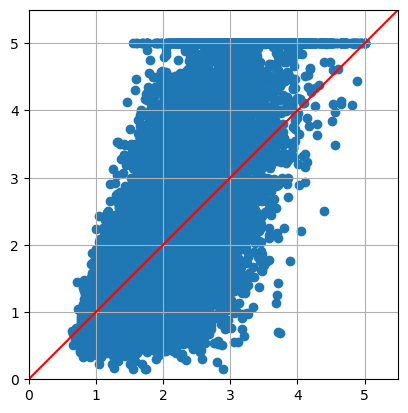

In [3]:
from sklearn.neighbors import KNeighborsRegressor
mod = KNeighborsRegressor()
mod.fit(X, y)
pred = mod.predict(X)

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.grid()
ax1.set_xlim([0,5.5])
ax1.set_ylim([0,5.5])
ax1.plot([0,5.5],[0,5.5],c='r')
ax1.scatter(pred,y)

pipeline

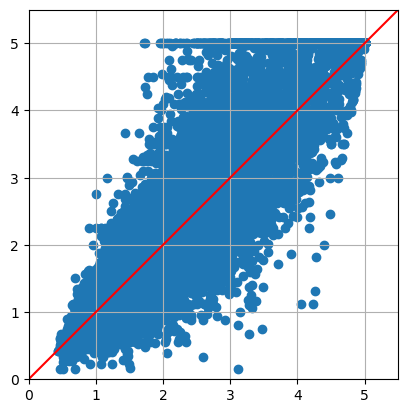

In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale_just name", StandardScaler()),
    ("model_just name", KNeighborsRegressor())
])
pipe.fit(X,y)
pred = pipe.predict(X)
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.grid()
ax1.set_xlim([0,5.5])
ax1.set_ylim([0,5.5])
ax1.plot([0,5.5],[0,5.5],c='r')
ax1.scatter(pred,y)

data frome the same set! CV is important

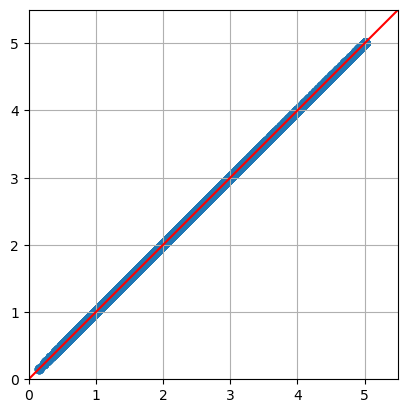

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale_just name", StandardScaler()),
    ("model_just name", KNeighborsRegressor(n_neighbors=  1  ))
])
pipe.fit(X,y)
pred = pipe.predict(X)
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.grid()
ax1.set_xlim([0,5.5])
ax1.set_ylim([0,5.5])
ax1.plot([0,5.5],[0,5.5],c='r')
ax1.scatter(pred,y)

again what a 'model' is? GridSearchCV

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_fei = Pipeline([
    ("scale_just name", StandardScaler()),
    ("model_just name", KNeighborsRegressor(n_neighbors=  1  ))
])

pipe_fei.get_params()#see all the features you are able to tweak

{'memory': None,
 'steps': [('scale_just name', StandardScaler()),
  ('model_just name', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale_just name': StandardScaler(),
 'model_just name': KNeighborsRegressor(n_neighbors=1),
 'scale_just name__copy': True,
 'scale_just name__with_mean': True,
 'scale_just name__with_std': True,
 'model_just name__algorithm': 'auto',
 'model_just name__leaf_size': 30,
 'model_just name__metric': 'minkowski',
 'model_just name__metric_params': None,
 'model_just name__n_jobs': None,
 'model_just name__n_neighbors': 1,
 'model_just name__p': 2,
 'model_just name__weights': 'uniform'}

In [7]:
import pandas as pd
mygrid = GridSearchCV(estimator=pipe_fei,
                        param_grid={'model_just name__n_neighbors':[1,2,3,4,5,6,7,8,9,10],
                                    'model_just name__p': [1,2]},
                        cv=3
             )
mygrid.fit(X,y)
pd.DataFrame(mygrid.cv_results_) # 一行是一种参数组合下，cv的结果（若只有1个参数，那就是一个参数的所有取值构成所有行）

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model_just name__n_neighbors,param_model_just name__p,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038886,0.009913,0.705330,0.149455,1,1,"{'model_just name__n_neighbors': 1, 'model_jus...",0.329083,0.354842,0.357966,0.347297,0.012942,19
1,0.034252,0.001259,0.460426,0.042238,1,2,"{'model_just name__n_neighbors': 1, 'model_jus...",0.324068,0.334830,0.323371,0.327423,0.005245,20
2,0.041556,0.007345,0.761296,0.013779,2,1,"{'model_just name__n_neighbors': 2, 'model_jus...",0.478058,0.522400,0.465493,0.488650,0.024410,17
3,0.039560,0.002860,0.719411,0.112749,2,2,"{'model_just name__n_neighbors': 2, 'model_jus...",0.468788,0.503457,0.424388,0.465544,0.032361,18
4,0.049521,0.012100,0.920205,0.084691,3,1,"{'model_just name__n_neighbors': 3, 'model_jus...",0.527375,0.567167,0.502557,0.532366,0.026612,15
5,0.035570,0.002886,0.637962,0.047233,3,2,"{'model_just name__n_neighbors': 3, 'model_jus...",0.518547,0.543340,0.473595,0.511827,0.028867,16
6,0.038231,0.004181,0.724714,0.027295,4,1,"{'model_just name__n_neighbors': 4, 'model_jus...",0.544158,0.588638,0.520912,0.551236,0.028098,12
7,0.034241,0.000918,0.595419,0.026614,4,2,"{'model_just name__n_neighbors': 4, 'model_jus...",0.540323,0.564974,0.499827,0.535041,0.026857,14
8,0.034577,0.003759,0.809017,0.067968,5,1,"{'model_just name__n_neighbors': 5, 'model_jus...",0.556029,0.599490,0.529620,0.561713,0.028806,9
9,0.034929,0.003272,0.610689,0.043558,5,2,"{'model_just name__n_neighbors': 5, 'model_jus...",0.551149,0.579313,0.511781,0.547414,0.027696,13


know the dataset you are using

In [8]:
from sklearn.datasets import fetch_california_housing
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

! 02 preprocess

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(".\drawndata1.csv")
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


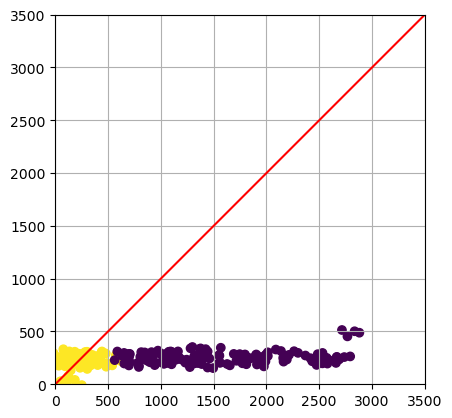

In [10]:
X = df[['x','y']].values
y = df['z'] == "a"

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.grid()
ax1.set_xlim([0,3500])
ax1.set_ylim([0,3500])
ax1.plot([0,3500],[0,3500],c='r')
ax1.scatter(X[:,0],X[:,1],c=y)

standard  scaler

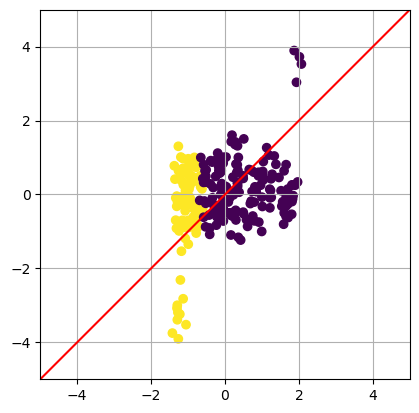

In [11]:
from sklearn.preprocessing import StandardScaler
X_new = StandardScaler().fit_transform(X)

'''standardscaler 无法削减outliers'''

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.grid()
ax1.set_xlim([-5,5])
ax1.set_ylim([-5,5])
ax1.plot([-5,5],[-5,5],c='r')
ax1.scatter(X_new[:,0],X_new[:,1],c=y)

why standard not good to outliers

(array([113., 201., 173., 142.,  76.,  62.,  59.,  44.,  39.,  25.,  13.,
          7.,  12.,   5.,  12.,   3.,   4.,   4.,   0.,   1.,   0.,   2.,
          0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([-1.14848029, -0.87480589, -0.60113149, -0.32745709, -0.05378268,
         0.21989172,  0.49356612,  0.76724052,  1.04091493,  1.31458933,
         1.58826373,  1.86193813,  2.13561254,  2.40928694,  2.68296134,
         2.95663574,  3.23031015,  3.50398455,  3.77765895,  4.05133335,
         4.32500776,  4.59868216,  4.87235656,  5.14603096,  5.41970537,
         5.69337977,  5.96705417,  6.24072857,  6.51440298,  6.78807738,
         7.06175178]),
 <BarContainer object of 30 artists>)

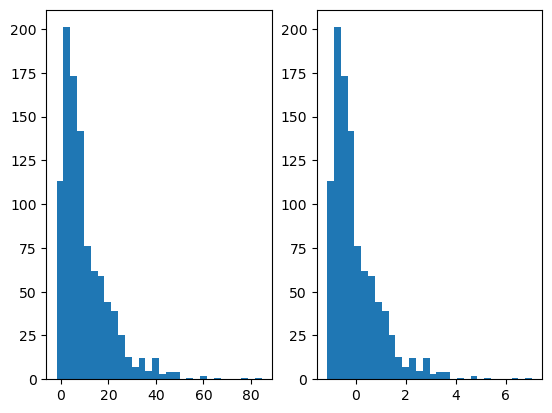

In [12]:
x = np.random.exponential(10,(1000))+np.random.normal(0,1,(1000))
plt.subplot(121)
plt.hist(x,30)
plt.subplot(122)
plt.hist((x-np.mean(x))/np.std(x), 30) # 这就是standard做的事情，但outlier还是存在的

quantile scale is useful to outliers

c:\Users\Lip\.conda\envs\py39\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.
  warnings.warn(


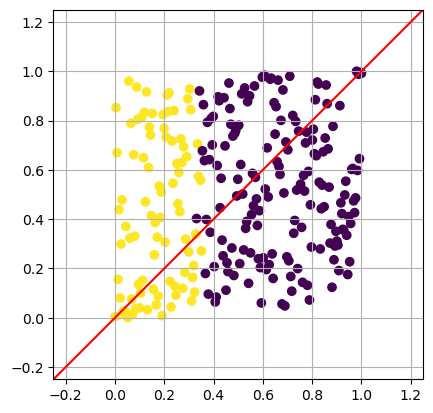

In [13]:
from sklearn.preprocessing import QuantileTransformer
X_new = QuantileTransformer().fit_transform(X)


fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.grid()
ax1.set_xlim([-0.25,1.25])
ax1.set_ylim([-0.25,1.25])
ax1.plot([-0.25,1.25],[-0.25,1.25],c='r')
ax1.scatter(X_new[:,0],X_new[:,1],c=y)

plot_output function

c:\Users\Lip\.conda\envs\py39\lib\site-packages\sklearn\preprocessing\_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.
  warnings.warn(


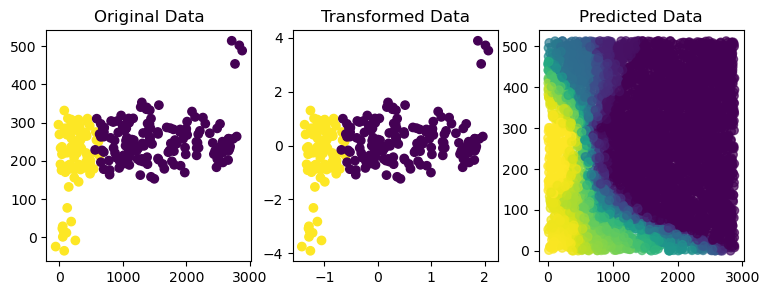

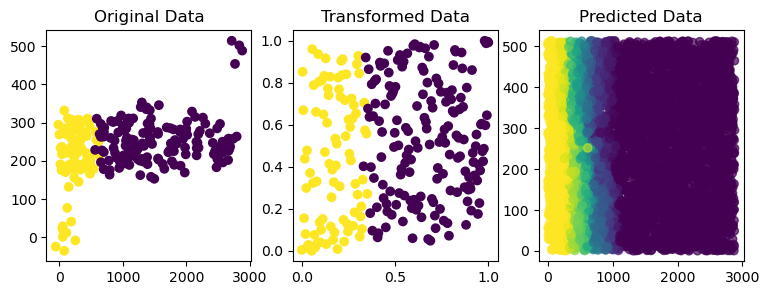

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline

def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X) 
    '''训练模型的部分是 pipe.fit(X, y)
    然后这个pipe就是训练好的模型。
    所有传入其中的数据会做2个事情，一是quantile scale, 二是KNN分类
    '''

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")

    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")

    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

plot_output(scaler=StandardScaler())
plot_output(scaler=QuantileTransformer())

the other dataset (非线性可分)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(".\drawndata2.csv")
df.head(3)

,x,y,z
0,469.759355,453.574946,a
1,535.331819,435.221848,a
2,504.285526,437.767578,a


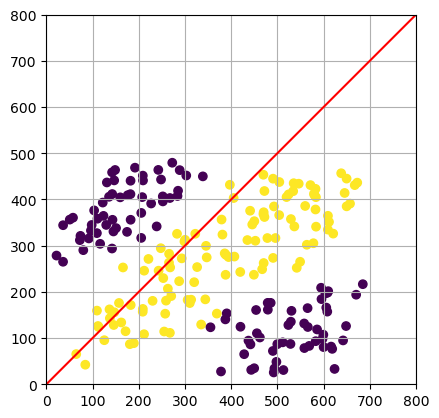

In [16]:
X = df[['x','y']].values
y = df['z'] == "a"

fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.grid()
ax1.set_xlim([0,800])
ax1.set_ylim([0,800])
ax1.plot([0,800],[0,800],c='r')
ax1.scatter(X[:,0],X[:,1],c=y)

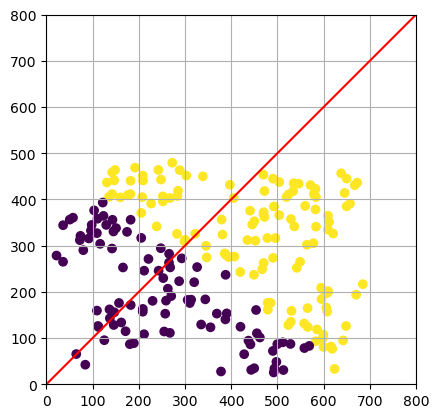

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.pipeline import Pipeline

fei_pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

pred = fei_pipe.fit(X,y).predict(X)
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.grid()
ax1.set_xlim([0,800])
ax1.set_ylim([0,800])
ax1.plot([0,800],[0,800],c='r')
ax1.scatter(X[:,0],X[:,1],c=pred) # LR效果不好

增加特征

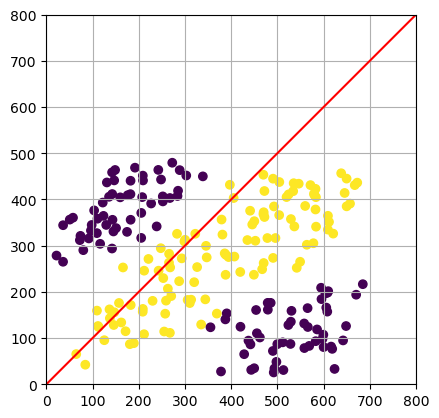

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

'''Generate a new feature matrix consisting of all polynomial combinations of the features 
with degree less than or equal to the specified degree. 
For example, if an input sample is two dimensional and of the form [a, b], 
the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].'''
fei_pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = fei_pipe.fit(X,y).predict(X)
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
ax1.grid()
ax1.set_xlim([0,800])
ax1.set_ylim([0,800])
ax1.plot([0,800],[0,800],c='r')
ax1.scatter(X[:,0],X[:,1],c=pred) # 增加特征后，LR效果不错

non-numerical data

In [71]:
arr = np.array(['low','low','high','medium']).reshape(-1,1)
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [72]:
enc.transform([["zero"]])

array([[0., 0., 0.]])

In [75]:
df = pd.read_clipboard(sep=",")

In [76]:
df

,x,y,z
0,153,437.599998,a
1,153,434.599998,a
2,153,429.599998,a
3,153,422.599998,a
4,153,415.599998,a
...,...,...,...
190,423,378.599998,c
191,421,380.599998,c
192,421,381.599998,c
193,420,382.599998,c


! 03 metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("creditcard.csv")[:80000]
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0


In [99]:
X = df.drop(columns=['Time','Amount','Class']).values
y = df['Class'].values
f"shapes of X={X.shape} y = {y.shape}, Fraud Cases={y.sum()}"

'shapes of X=(80000, 28) y = (80000,), Fraud Cases=196'

In [86]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(max_iter=1000)
mod.fit(X,y).predict(X).sum()
# 151, 与实际的196有差距

151

In [87]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression(max_iter=1000, class_weight={0:1,1:2}) # class 0, weight=1; class 1, weight=2
mod.fit(X,y).predict(X).sum()
# 171, 与实际的196有差距,说明可以用GridSearch进一步寻找合适的权重

171

In [88]:
from sklearn.model_selection import GridSearchCV

fei_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1,1:v} for v in range(1,4)]},
    cv = 4,
    n_jobs = -1
)

fei_grid.fit(X,y)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [89]:
pd.DataFrame(fei_grid.cv_results_)
# 下面的score是根据什么metric计算的？
# 我们没有指定。那这个metric从何而来

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,4.516949,0.692312,0.018630,0.008904,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.99405,0.99835,0.99945,0.99780,0.997413,0.002030,1
1,4.097988,0.825855,0.014229,0.006601,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.99025,0.99840,0.99960,0.99805,0.996575,0.003697,2
2,3.823137,0.760295,0.011966,0.005597,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.98730,0.99845,0.99960,0.99815,0.995875,0.004980,3


In [91]:
lr = LogisticRegression()
??lr.score

Signature: lr.score(X, y, sample_weight=None)
Source:   
    def score(self, X, y, sample_weight=None):
        """
        Return the mean accuracy on the given test data and labels.

        In multi-label classification, this is the subset accuracy
        which is a harsh metric since you require for each sample that
        each label set be correctly predicted.

        Parameters
        ----------
        X : array-like of shape (n_samples, n_features)
            Test samples.

        y : array-like of shape (n_samples,) or (n_samples, n_outputs)
            True labels for `X`.

        sample_weight : array-like of shape (n_samples,), default=None
            Sample weights.

        Returns
        -------
        score : float
            Mean accuracy of ``self.predict(X)`` wrt. `y`.
        """
        from .metrics import accuracy_score

        return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
File:      c:\users\lip\.conda\envs\py39\lib\site-pack

change default score

In [94]:
from sklearn.metrics import precision_score, recall_score

precision_score(y, fei_grid.predict(X))
recall_score(y, fei_grid.predict(X))

0.5918367346938775

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

fei_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1,1:v} for v in np.linspace(1,20,30)]},
    scoring={'precision': make_scorer(precision_score), 'recall_score': make_scorer(recall_score)},
    refit='precision',
    return_train_score=True,
    cv = 10,
    n_jobs = -1
)

'''refit 是为了让GridSearch知道，到底用哪个指标做排序的指标'''

fei_grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 14.758620689655173},
                                          {0: 1, 1: 15.413793103448276},
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='precision', return_train_score=True,
             scoring={'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

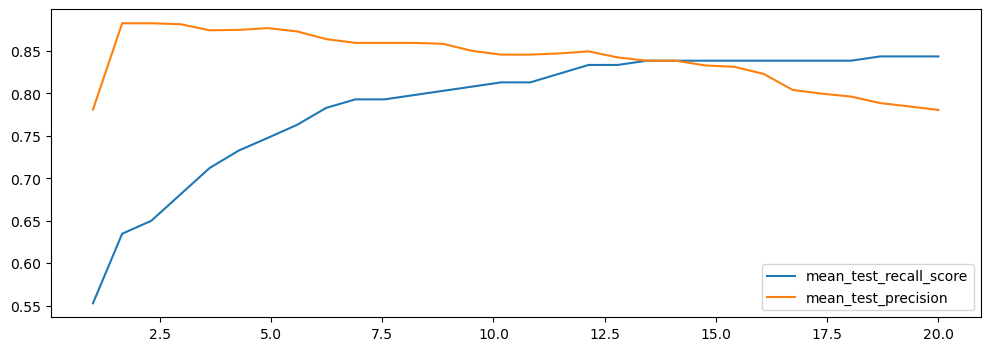

In [117]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(fei_grid.cv_results_)

# 这里这个名字 mean_是自动的，test_是测试集，recall_score和上面make_scorer前面的名字要一致
for score in ['mean_test_recall_score', 'mean_test_precision']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend();

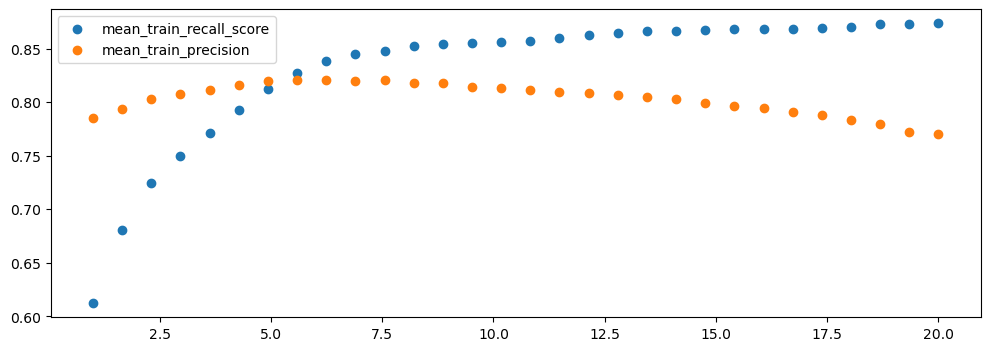

In [119]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(fei_grid.cv_results_)
for score in ['mean_train_recall_score', 'mean_train_precision']:
    plt.scatter(x=[_[1] for _ in df_results['param_class_weight']], 
                y=df_results[score.replace('test', 'train')], 
                label=score)
plt.legend();

make our own metric

In [124]:
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

fei_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0:1,1:v} for v in np.linspace(1,20,30)]},
    scoring={'precision': make_scorer(precision_score), 
            'recall_score': make_scorer(recall_score),
            'min_both': make_scorer(min_recall_precision, greater_is_better=True)},
    refit='min_both',
    return_train_score=True,
    cv = 10,
    n_jobs = -1
)

fei_grid.fit(X,y)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1.0},
                                          {0: 1, 1: 1.6551724137931034},
                                          {0: 1, 1: 2.310344827586207},
                                          {0: 1, 1: 2.9655172413793105},
                                          {0: 1, 1: 3.6206896551724137},
                                          {0: 1, 1: 4.275862068965517},
                                          {0: 1, 1: 4.931034482758621},
                                          {0: 1, 1: 5.586206896551724},
                                          {0: 1, 1: 6.241379310344827},
                                          {0: 1, 1: 6.896551724137931},...
                                          {0: 1, 1: 16.06896551724138},
                                          {0: 1, 1: 16.724137931034484},
                                          {0: 1, 1: 17.379310344827587},
                                          {0: 1, 1: 18.03448275862069},
                                          {0: 1, 1: 18.689655172413794},
                                          {0: 1, 1: 19.344827586206897},
                                          {0: 1, 1: 20.0}]},
             refit='min_both', return_train_score=True,
             scoring={'min_both': make_scorer(min_recall_precision),
                      'precision': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

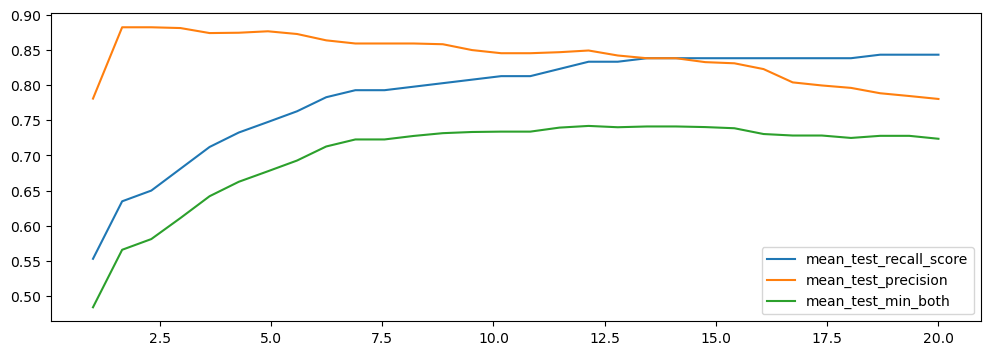

In [126]:
plt.figure(figsize=(12, 4))
df_results = pd.DataFrame(fei_grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision', 'mean_test_min_both']:
    plt.plot([_[1] for _ in df_results['param_class_weight']], 
             df_results[score], 
             label=score)
plt.legend();

In [108]:
pd.DataFrame(fei_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,split5_train_recall_score,split6_train_recall_score,split7_train_recall_score,split8_train_recall_score,split9_train_recall_score,mean_train_recall_score,std_train_recall_score
0,6.340485,1.610717,0.056748,0.086516,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",1.000000,0.463415,0.583333,1.000000,...,0.627119,0.548023,0.573864,0.573864,0.562500,0.613636,0.636364,0.607955,0.612185,0.054733
1,6.088754,1.824755,0.027529,0.007167,"{0: 1, 1: 1.6551724137931034}","{'class_weight': {0: 1, 1: 1.6551724137931034}}",1.000000,0.463415,0.583333,1.000000,...,0.683616,0.627119,0.670455,0.647727,0.630682,0.687500,0.698864,0.687500,0.680239,0.050286
2,6.038714,1.927200,0.026088,0.008444,"{0: 1, 1: 2.310344827586207}","{'class_weight': {0: 1, 1: 2.310344827586207}}",1.000000,0.463415,0.583333,1.000000,...,0.740113,0.683616,0.710227,0.698864,0.687500,0.715909,0.744318,0.727273,0.724454,0.043881
3,5.860093,1.108131,0.024397,0.005594,"{0: 1, 1: 2.9655172413793105}","{'class_weight': {0: 1, 1: 2.9655172413793105}}",1.000000,0.452381,0.583333,1.000000,...,0.785311,0.706215,0.744318,0.732955,0.715909,0.755682,0.772727,0.738636,0.749978,0.039589
4,5.550032,1.391013,0.046376,0.030841,"{0: 1, 1: 3.6206896551724137}","{'class_weight': {0: 1, 1: 3.6206896551724137}}",1.000000,0.452381,0.583333,1.000000,...,0.824859,0.740113,0.755682,0.744318,0.727273,0.778409,0.784091,0.761364,0.771498,0.037959
5,5.859250,1.261251,0.040403,0.025530,"{0: 1, 1: 4.275862068965517}","{'class_weight': {0: 1, 1: 4.275862068965517}}",1.000000,0.452381,0.583333,1.000000,...,0.841808,0.768362,0.778409,0.789773,0.772727,0.789773,0.795455,0.772727,0.792485,0.029289
6,4.913514,0.882357,0.035306,0.031677,"{0: 1, 1: 4.931034482758621}","{'class_weight': {0: 1, 1: 4.931034482758621}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.802260,0.789773,0.818182,0.801136,0.801136,0.818182,0.789773,0.812327,0.021063
7,4.452943,1.019303,0.019249,0.002094,"{0: 1, 1: 5.586206896551724}","{'class_weight': {0: 1, 1: 5.586206896551724}}",1.000000,0.452381,0.583333,1.000000,...,0.847458,0.813559,0.829545,0.829545,0.812500,0.806818,0.835227,0.818182,0.827080,0.017190
8,5.323101,1.882018,0.043943,0.041581,"{0: 1, 1: 6.241379310344827}","{'class_weight': {0: 1, 1: 6.241379310344827}}",0.944444,0.452381,0.583333,0.947368,...,0.847458,0.824859,0.846591,0.835227,0.823864,0.829545,0.857955,0.829545,0.838431,0.013974
9,4.903800,1.493464,0.026030,0.026002,"{0: 1, 1: 6.896551724137931}","{'class_weight': {0: 1, 1: 6.896551724137931}}",0.944444,0.452381,0.583333,0.947368,...,0.853107,0.830508,0.846591,0.835227,0.829545,0.835227,0.863636,0.846591,0.844665,0.012015


！04 meta

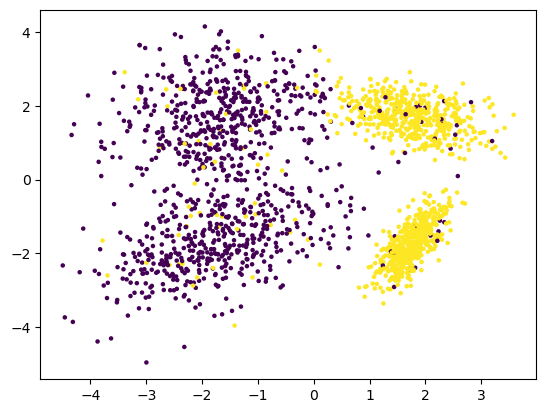

In [127]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2000, n_features=2,
                           n_redundant=0, random_state=21,
                           class_sep=1.75, flip_y=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);

In [128]:
def make_plots():
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3");

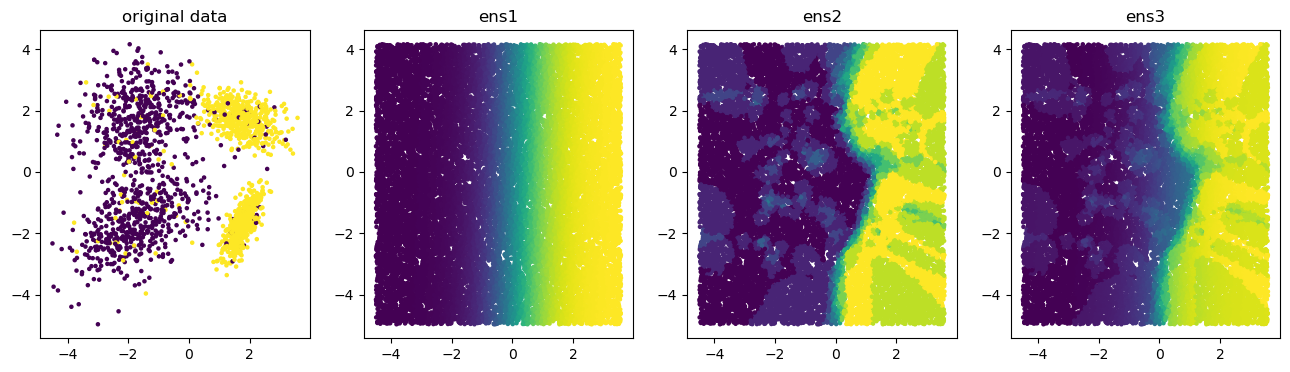

In [131]:
clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)],
                        voting='soft',
                        weights=[10.5, 12.5])
clf3.fit(X, y)

make_plots()

# ------------below is the code from Github

API is the same, easy to change model

In [10]:
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363])

Next, we can apply models! 

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.datasets import fetch_california_housing
X, y = fetch_california_housing(return_X_y=True)

mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([4.13164983, 3.97660644, 3.67657094])

In [4]:
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([2.826802, 2.1594  , 3.650404])

Maybe we should inspect the results.

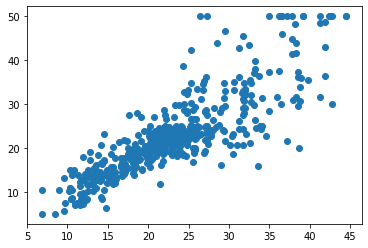

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import load_boston
import matplotlib.pylab as plt

X, y = load_boston(return_X_y=True)

mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

Let's put everything into a pipeline.

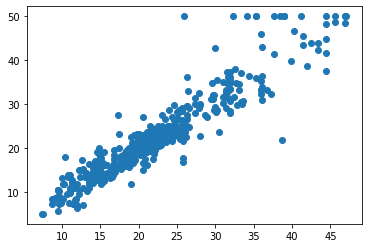

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = load_boston(return_X_y=True)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's also apply some settings!

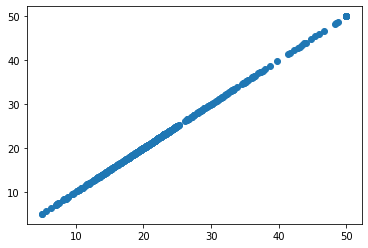

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.pipeline import Pipeline
import matplotlib.pylab as plt

X, y = load_boston(return_X_y=True)

# If n_neighbors = 1, we're totally cheating with the chart below.
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

Let's now use a gridsearch!

In [12]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)
mod.fit(X, y);

In [13]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001254,0.000084,0.001890,0.000178,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001168,0.000080,0.001864,0.000162,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001135,0.000084,0.001838,0.000103,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001118,0.000071,0.001947,0.000141,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001004,0.000062,0.001833,0.000083,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.000872,0.000029,0.001508,0.000110,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001259,0.000337,0.001588,0.000111,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.000838,0.000008,0.001636,0.000167,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.000979,0.000148,0.001927,0.000287,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000927,0.000041,0.001772,0.000095,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


Finally, lets remember that we should look at the data.

In [14]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu